In [1]:
import sys
sys.path.insert(1, '/home/elinfi/MasterCode/src/class/')

In [2]:
import os
import cooltools.lib.plotting

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pretty_plotting as pplot

from k_medoids import KMedoids
from data_preparation import DataPreparation
from mid_point_log_norm import MidPointLogNorm
from dissimilarity_matrix import DissimilarityMatrix

In [3]:
# get path to multi resolution hic data
path_wt = '/home/elinfi/coolers/HiC_wt_001.mcool'

resolution = 16000
region = 'chr10:6351511-10351511' # region of genome
balance = True
save = True

data = DataPreparation(path_wt, resolution, region, balance)
mat = data.matrix
mat = np.load('/home/elinfi/MasterCode/data/chr10:6351511-10351511_reldiff_sqrt_wt1_wt2.npy')

In [4]:
# dissimilarity matrix
dissimilarity = DissimilarityMatrix(mat)

In [5]:
if save:
    # interactions difference
    interactions_dist = dissimilarity.scipy_dist(metric='interactions_dist', col1=0, col2=3)
    dist_mat = interactions_dist
    #np.save('/home/elinfi/MasterCode/data/interactions_dist_2.npy', interactions_dist)
else:
    dist_mat = np.load('/home/elinfi/MasterCode/data/interactions_dist.npy')

In [6]:
### calculate kmedoids clusters
medoids = 5
random_state = 19

n = dissimilarity.n
triu_nan_idx = dissimilarity.nan_idx_triu

# find clusters using k-medoids
kmedoids = KMedoids(dist_mat)
cluster_result = kmedoids.clusters(medoids=medoids, random_state=random_state)
labels_mat = kmedoids.labels4plotting_nan(n, triu_nan_idx)

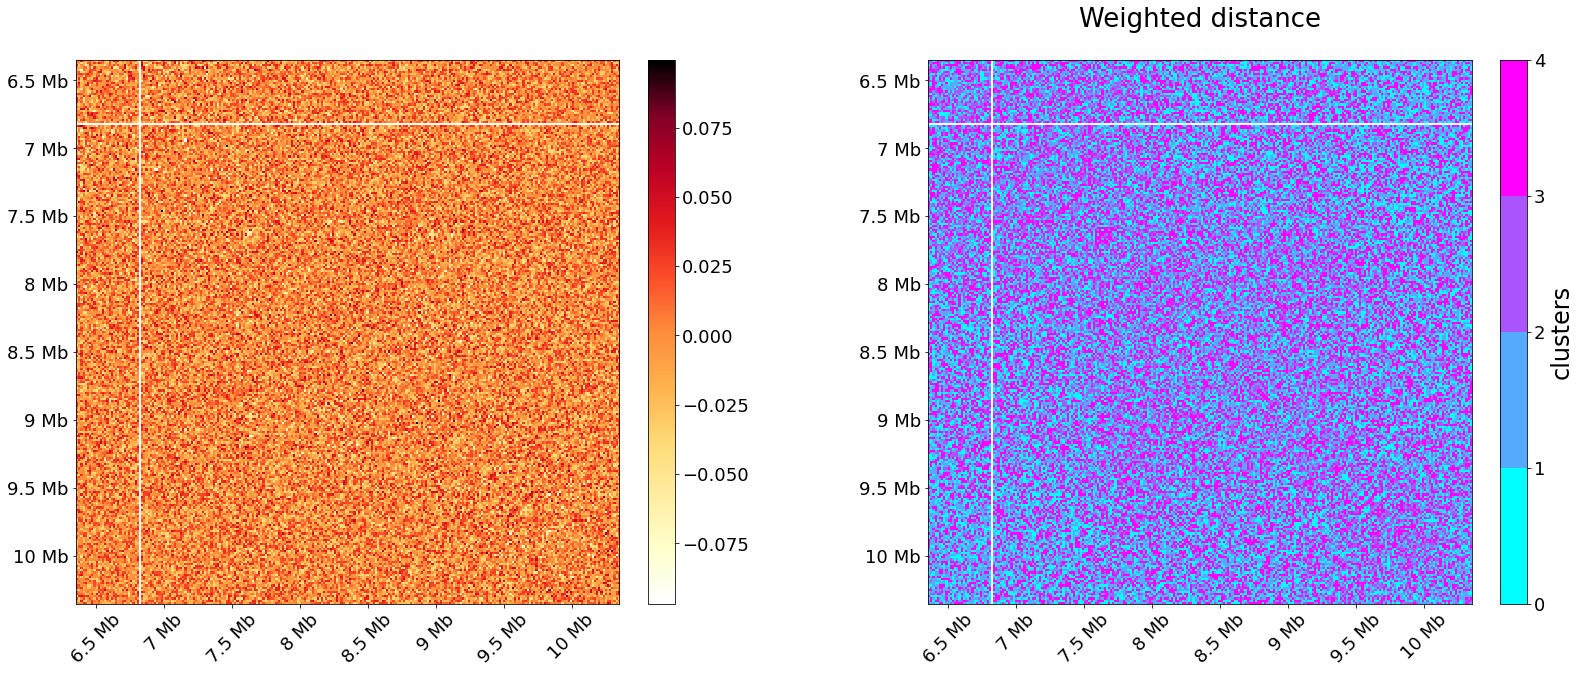

In [11]:
EXTENT = pplot.region2extent(region)
pplot.font_size(18, 24, 26)

f, axs = plt.subplots(figsize=(28, 10),
                      nrows=1,
                      ncols=2,
                      sharex=True, sharey=False)

ax = axs[0]
im = ax.matshow(mat,
                cmap='fall',
                #norm=mpl.colors.LogNorm(),
                extent=EXTENT)
plt.colorbar(im, fraction=0.046, pad=0.04, label='', ax=ax)
#ax.grid(b=True)
ax.set(title='')
pplot.format_ticks(ax)

ax = axs[1]

# create discrete colormap
cmap = plt.cm.cool
bounds = np.linspace(0, medoids, medoids+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

im = ax.matshow(labels_mat,
                norm=norm,
                cmap=cmap,
                alpha=1,
                extent=EXTENT)
plt.colorbar(im, fraction=0.046, pad=0.04, label='clusters', ax=ax)
#ax.grid(b=True)
ax.set(title='Weighted distance')
pplot.format_ticks(ax)
plt.savefig('/home/elinfi/MasterCode/img/Clusters/org_5.pdf')
np.save('/home/elinfi/MasterCode/data/org_cluster_5.npy', cluster_result)
np.save('/home/elinfi/MasterCode/data/org_label_5.npy', labels_mat)

In [8]:
### calculate kmedoids clusters
medoids = 4
random_state = 19

n = dissimilarity.n
triu_nan_idx = dissimilarity.nan_idx_triu

# find clusters using k-medoids
kmedoids = KMedoids(dist_mat)
cluster_result = kmedoids.clusters(medoids=medoids, random_state=random_state)
labels_mat = kmedoids.labels4plotting_nan(n, triu_nan_idx)
print(type(labels_mat))

<class 'numpy.ndarray'>


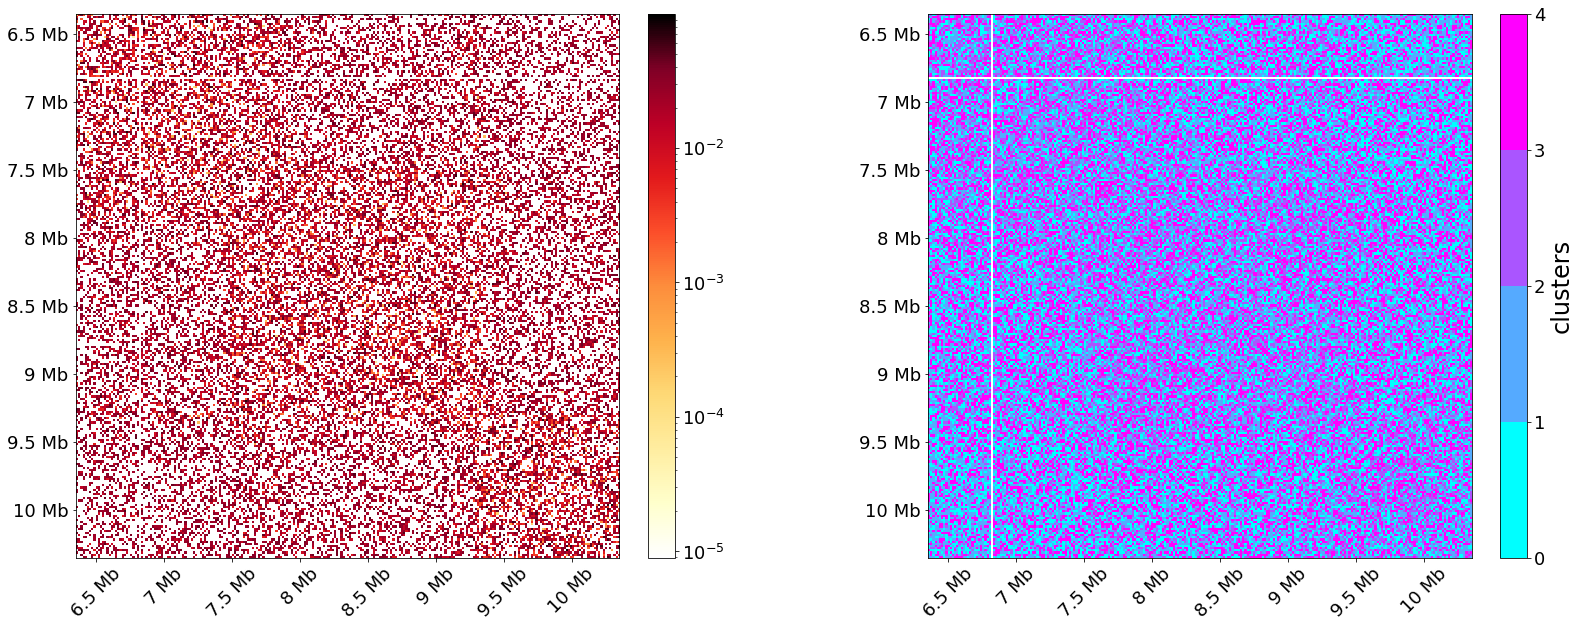

In [9]:
EXTENT = pplot.region2extent(region)
pplot.font_size(18, 24, 26)

f, axs = plt.subplots(figsize=(28, 10),
                      nrows=1,
                      ncols=2,
                      sharex=True, sharey=False)

ax = axs[0]
im = ax.matshow(mat,
                cmap='fall',
                norm=mpl.colors.LogNorm(),
                extent=EXTENT)
plt.colorbar(im, fraction=0.046, pad=0.04, label='', ax=ax)
ax.set(title='')
pplot.format_ticks(ax)

ax = axs[1]

# create discrete colormap
cmap = plt.cm.cool
bounds = np.linspace(0, medoids, medoids+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

im = ax.matshow(labels_mat,
                norm=norm,
                cmap=cmap,
                alpha=1,
                extent=EXTENT)
plt.colorbar(im, fraction=0.046, pad=0.04, label='clusters', ax=ax)
ax.set(title='')
pplot.format_ticks(ax)
plt.savefig('/home/elinfi/MasterCode/img/Clusters/org_4.pdf')
np.save('/home/elinfi/MasterCode/data/org_cluster_4.npy', cluster_result)
np.save('/home/elinfi/MasterCode/data/org_label_4.npy', labels_mat)